# Analysis on Types of Accounts / Types of Influencers

Project 3 Research QUestion 1 Analysis Notebook <br>
Ashley Kang

In [1]:
import json
import pandas as pd

#read in the master csv file
df = pd.DataFrame(pd.read_csv("master.csv")) 

#print(df.columns)

/var/folders/zh/lh50ntf51kvdjr8cmpd9y7840000gn/T/ipykernel_99904/1090535396.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#remove the "T" in the timestamp and save it into a new column
newlist = []
for row in df['video_timestamp']:
    timestamp = str(row).split('T')
    newlist.append(" ".join(timestamp))

#print(newlist)
df['video_timestamp_new'] = newlist


In [3]:
#make a list of all the author's follower counts
followerNumberList = df['author_followercount'].tolist()
#print(followerNumberList)


In [4]:
#dictionary with the range of followers to identify influencer type
influencerDict = {'none': range(0, 1000),
                  'nano':  range(1000,10000), 
                  'micro': range (10000,100000),
                  'macro': range(100000,1000000), 
                  'mega': range(1000000, 1000000000000000000000000000000000000000)}


In [5]:
#function that identifies the influencer type 
def influencer_type(number):
    for category, number_range in influencerDict.items():
        if number in number_range:
            return category
    return 'unknown'

In [6]:
#function to count the number of accounts in the following categories
def count_influencer_type(number_list):
    account_type_counted = {'unknown': 0, 'none': 0, 'nano': 0, 'micro': 0, 'macro': 0, 'mega': 0}
    for number in number_list:
        category = influencer_type(number)
        account_type_counted[category] += 1
    return account_type_counted

### Time-Series Code

In [7]:
from pandas import Series
import matplotlib.pyplot as plt

In [14]:
filename = "master.csv"

timeseriesDF = pd.DataFrame(pd.read_csv("master.csv")) 

#create individual csv files to make timeseries

for song in list(set(timeseriesDF['sound'])):
     newdf = timeseriesDF[timeseriesDF['sound'] == f"{song}"]
     newdf.to_csv(f'{song}.csv', index=False)

In [15]:
#convert string to datetime format
dates = pd.to_datetime(df['video_timestamp_new'], errors='coerce')
df.dropna(subset=['video_timestamp_new'], inplace=True)

df['video_playcount'] = pd.to_numeric(df['video_playcount'], errors='coerce')
    
df = df.iloc[:len(df['video_timestamp_new'])]

In [16]:
def makeTS(filename):
    df = pd.read_csv(filename)

    # new column for timestamp without "T"
    newlist = []
    
    for row in df['video_timestamp']:
        timestamp = str(row).split("T")
        newlist.append(" ".join(timestamp))
    df['video_timestamp_new'] = newlist
    
    #convert string to datetime format
    dates = pd.to_datetime(df['video_timestamp_new'], errors='coerce')
    df.dropna(subset=['video_timestamp_new'], inplace=True)

    df['video_playcount'] = pd.to_numeric(df['video_playcount'], errors='coerce')
    
    df = df.iloc[:len(df['video_timestamp_new'])]
    
    ts = pd.Series(list(df['video_playcount']), index=dates)

    # Find the maximum count
    max_count = ts.max()  
    
    # Get the timestamp corresponding to the maximum count
    max_timestamp = ts[ts == max_count].index[0]  

    return ts, max_timestamp

def makeSubplot(ts, period, axs, ax, color, label):
    watches = ts.resample(period).count()
    
    if period == 'W':
        time = 'week'
    elif period == 'M':
        time = 'month'
    elif period == 'D':
        time = 'day' 
        
    axs[ax].plot(watches.index, watches, color=color, label=label)
    
def makePlot(data, period):
    fig, axs = plt.subplots(len(data), 1, figsize=(10, len(data) * 2))
    
    for i in range(len(data)):
        filename = data[i]
        ts, max_timestamp = makeTS(filename)
        color = plt.cm.viridis(i / len(data)) 
        label = filename
        makeSubplot(ts, period, axs, i, color, label)
        
        #axis for 2021
        axs[i].set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2022-12-31'))
        
        #axis for 2022
        #axs[i].set_xlim(pd.Timestamp('2021-11-01'), pd.Timestamp('2024-05-31'))
        
        #axis for 2023
        #axs[i].set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-05-31'))
        
        #axis for 2024
        #axs[i].set_xlim(pd.Timestamp('2023-08-01'), pd.Timestamp('2024-05-31'))
        
        
        print("Maximum count timestamp for", label, ":", max_timestamp)

    plt.tight_layout()
    plt.show()


Maximum count timestamp for fancylike.csv : 2021-07-19 23:46:15
Maximum count timestamp for heartbreak.csv : 2021-03-01 05:44:58
Maximum count timestamp for savage.csv : 2020-03-26 16:54:37
Maximum count timestamp for up.csv : 2021-03-17 20:38:24


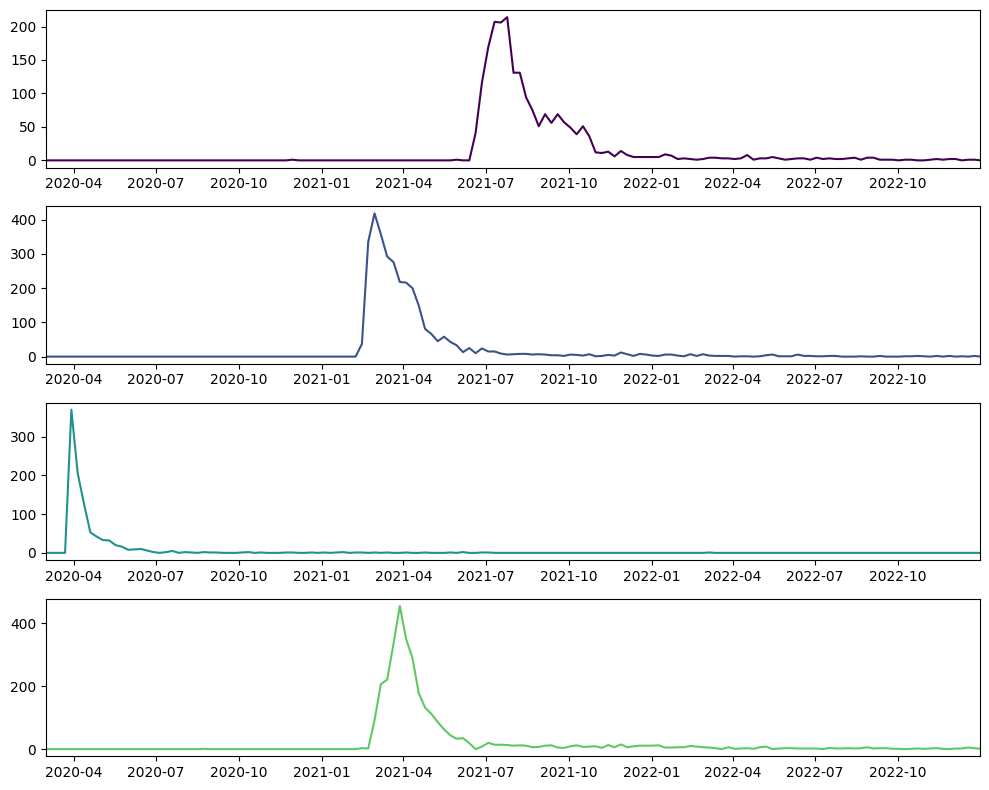

In [17]:
#2021 time-series
#uncomment the corresponding axes from the makePlot() function
data2021 = ['fancylike.csv','heartbreak.csv', 'savage.csv', 'up.csv']
makePlot(data2021,'W')

Maximum count timestamp for conceited.csv : 2022-07-02 22:28:51
Maximum count timestamp for nowahala.csv : 2021-11-30 16:12:42
Maximum count timestamp for sweaterweather.csv : 2022-10-29 13:59:03


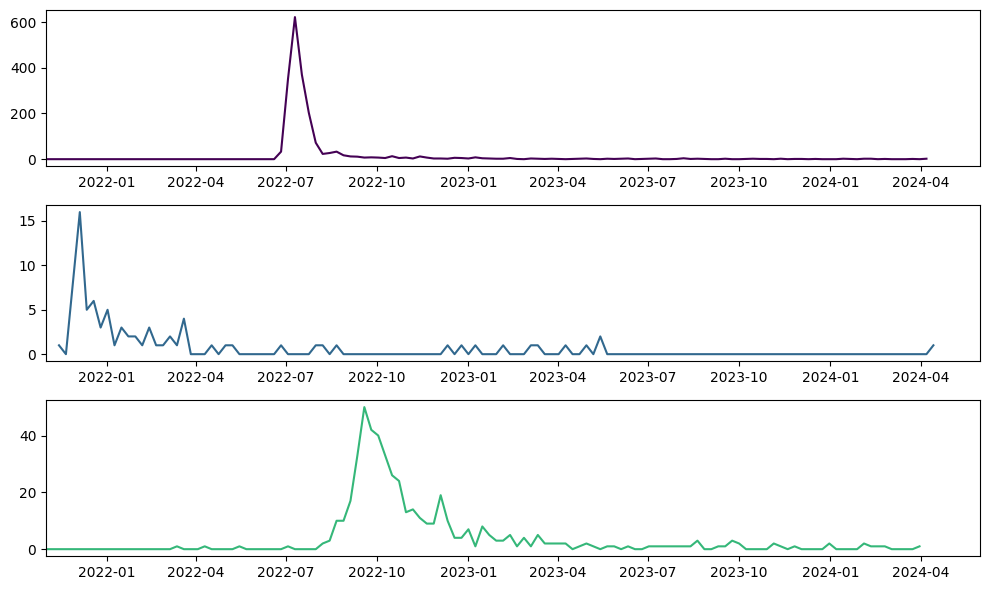

In [18]:
def makePlot(data, period):
    fig, axs = plt.subplots(len(data), 1, figsize=(10, len(data) * 2))
    
    for i in range(len(data)):
        filename = data[i]
        ts, max_timestamp = makeTS(filename)
        color = plt.cm.viridis(i / len(data)) 
        label = filename
        makeSubplot(ts, period, axs, i, color, label)
        
        #axis for 2021
        #axs[i].set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2022-12-31'))
        
        #axis for 2022
        axs[i].set_xlim(pd.Timestamp('2021-11-01'), pd.Timestamp('2024-05-31'))
        
        #axis for 2023
        #axs[i].set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-05-31'))
        
        #axis for 2024
        #axs[i].set_xlim(pd.Timestamp('2023-08-01'), pd.Timestamp('2024-05-31'))
        
        
        print("Maximum count timestamp for", label, ":", max_timestamp)

    plt.tight_layout()
    plt.show()


#2022 time-series
#uncomment the corresponding axes from the makePlot() function
data2022 = ['conceited.csv', 'nowahala.csv', 'sweaterweather.csv']
makePlot(data2022, 'W')

Maximum count timestamp for dropittothefloor.csv : 2023-12-12 03:55:05
Maximum count timestamp for itgirl.csv : 2023-10-29 00:45:21
Maximum count timestamp for mwahmwah.csv : 2023-12-11 06:47:10
Maximum count timestamp for thisyear.csv : 2023-06-13 00:37:00
Maximum count timestamp for watertyla.csv : 2023-10-19 20:56:25


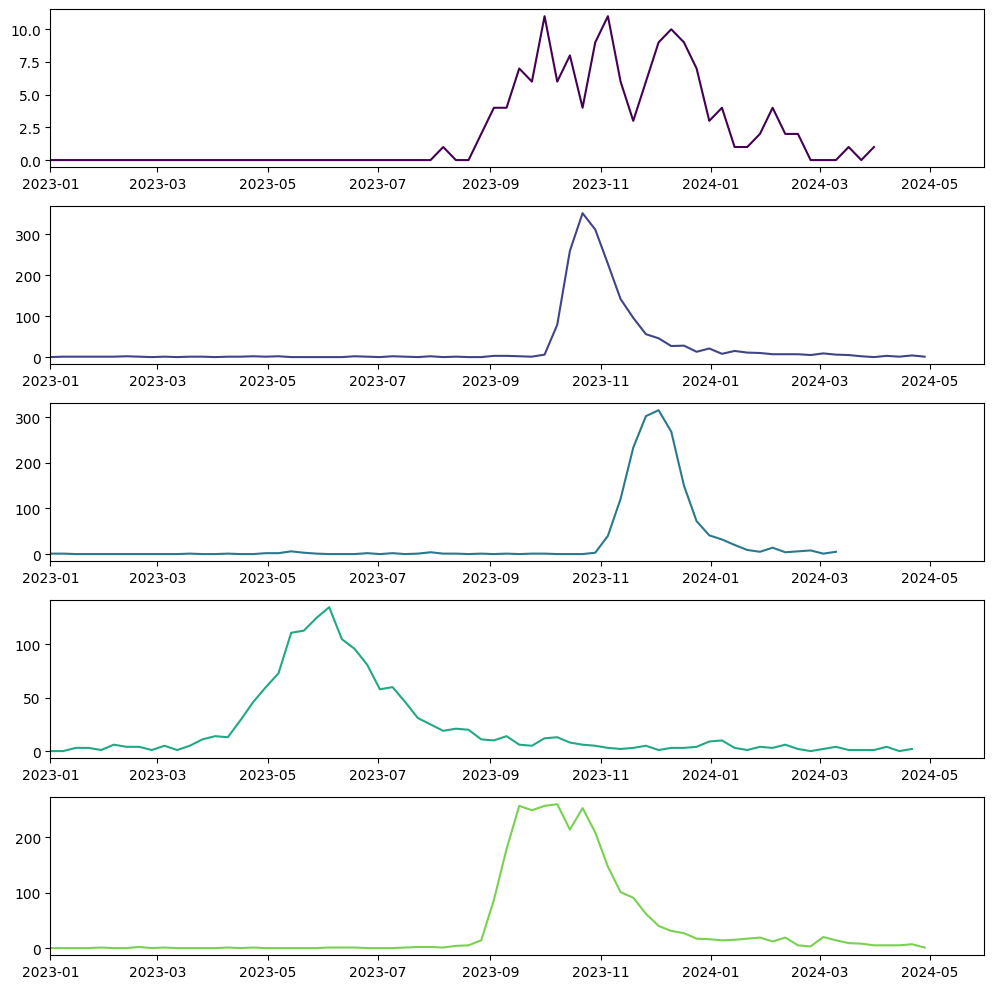

In [19]:
#2023 time-series
#uncomment the corresponding axes from the makePlot() function
def makePlot(data, period):
    fig, axs = plt.subplots(len(data), 1, figsize=(10, len(data) * 2))
    
    for i in range(len(data)):
        filename = data[i]
        ts, max_timestamp = makeTS(filename)
        color = plt.cm.viridis(i / len(data)) 
        label = filename
        makeSubplot(ts, period, axs, i, color, label)
        
        #axis for 2021
        #axs[i].set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2022-12-31'))
        
        #axis for 2022
        #axs[i].set_xlim(pd.Timestamp('2021-11-01'), pd.Timestamp('2024-05-31'))
        
        #axis for 2023
        axs[i].set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-05-31'))
        
        #axis for 2024
        #axs[i].set_xlim(pd.Timestamp('2023-08-01'), pd.Timestamp('2024-05-31'))
        
        
        print("Maximum count timestamp for", label, ":", max_timestamp)

    plt.tight_layout()
    plt.show()


data2023 = ['dropittothefloor.csv', 'itgirl.csv', 'mwahmwah.csv', 'thisyear.csv', 'watertyla.csv']
makePlot(data2023, 'W')

Maximum count timestamp for bam.csv : 2024-03-12 12:17:31
Maximum count timestamp for flomilli.csv : 2023-12-25 12:15:13
Maximum count timestamp for glo.csv : 2024-04-11 22:41:32
Maximum count timestamp for tyla.csv : 2024-04-12 18:29:33
Maximum count timestamp for wannabe.csv : 2024-04-10 12:12:52


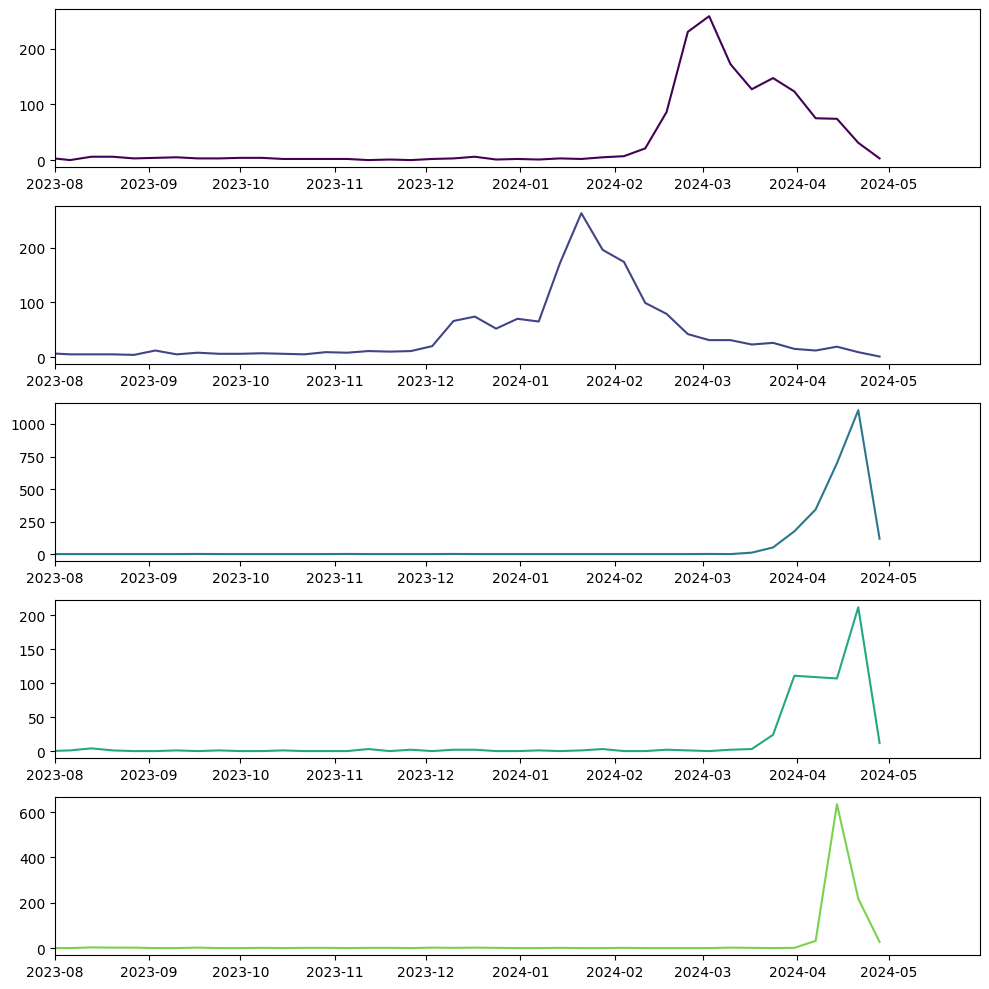

In [20]:
#2024 time-series
#uncomment the corresponding axes from the makePlot() function

def makePlot(data, period):
    fig, axs = plt.subplots(len(data), 1, figsize=(10, len(data) * 2))
    
    for i in range(len(data)):
        filename = data[i]
        ts, max_timestamp = makeTS(filename)
        color = plt.cm.viridis(i / len(data)) 
        label = filename
        makeSubplot(ts, period, axs, i, color, label)
        
        #axis for 2021
        #axs[i].set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2022-12-31'))
        
        #axis for 2022
        #axs[i].set_xlim(pd.Timestamp('2021-11-01'), pd.Timestamp('2024-05-31'))
        
        #axis for 2023
        #axs[i].set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-05-31'))
        
        #axis for 2024
        axs[i].set_xlim(pd.Timestamp('2023-08-01'), pd.Timestamp('2024-05-31'))
        
        
        print("Maximum count timestamp for", label, ":", max_timestamp)

    plt.tight_layout()
    plt.show()


data2024 = ['bam.csv', 'flomilli.csv', 'glo.csv', 'tyla.csv', 'wannabe.csv']
makePlot(data2024, 'W')

##### timestamps for 2021
sorted by descending values for the video_playcounts and recorded the values of the first row in google colab

In [ ]:
#timestamps for 2021
fancy = df[df['video_timestamp_new'].str.contains('2021-07-19')]
fancy[df['sound']=='fancylike']

In [ ]:
hearbreak = df[df['video_timestamp_new'].str.contains('2021-03-01')]
hearbreak[df['sound']=='heartbreak']

In [ ]:
savage = df[df['video_timestamp_new'].str.contains('2020-03-26')]
savage[df['sound']=='savage']

In [ ]:
up = df[df['video_timestamp_new'].str.contains('2021-03-17')]
up[df['sound']=='up']

##### timestamps for 2022

sorted by descending values for the video_playcounts and recorded the values of the first row in google colab

In [ ]:
#timestamps for 2022
conceited = df[df['video_timestamp_new'].str.contains('2022-07-02')]
conceited[df['sound']=='conceited']

In [ ]:
nowahala = df[df['video_timestamp_new'].str.contains('2021-11-30')]
nowahala[df['sound']=='heartbreak']

In [ ]:
sweaterweather = df[df['video_timestamp_new'].str.contains('2022-10-29')]
sweaterweather[df['sound']=='sweaterweather']

##### timestamps for 2023

sorted by descending values for the video_playcounts and recorded the values of the first row in google colab

In [ ]:
#timestamps for 2023
conceited = df[df['video_timestamp_new'].str.contains('2022-07-02')]
conceited[df['sound']=='conceited']

In [ ]:
nowahala = df[df['video_timestamp_new'].str.contains('2021-11-30')]
nowahala[df['sound']=='heartbreak']

In [ ]:
sweaterweather = df[df['video_timestamp_new'].str.contains('2022-10-29')]
sweaterweather[df['sound']=='sweaterweather']

In [ ]:
nowahala = df[df['video_timestamp_new'].str.contains('2021-11-30')]
nowahala[df['sound']=='heartbreak']

In [ ]:
sweaterweather = df[df['video_timestamp_new'].str.contains('2022-10-29')]
sweaterweather[df['sound']=='sweaterweather']

##### timestamps for 2024

sorted by descending values for the video_playcounts and recorded the values of the first row in google colab

In [ ]:
#timestamps for 2024
conceited = df[df['video_timestamp_new'].str.contains('2022-07-02')]
conceited[df['sound']=='conceited']

In [ ]:
nowahala = df[df['video_timestamp_new'].str.contains('2021-11-30')]
nowahala[df['sound']=='heartbreak']

In [ ]:
sweaterweather = df[df['video_timestamp_new'].str.contains('2022-10-29')]
sweaterweather[df['sound']=='sweaterweather']

In [ ]:
nowahala = df[df['video_timestamp_new'].str.contains('2021-11-30')]
nowahala[df['sound']=='heartbreak']

In [ ]:
sweaterweather = df[df['video_timestamp_new'].str.contains('2022-10-29')]
sweaterweather[df['sound']=='sweaterweather']

##### convert numbers collected from previous lines to the type of influencer

In [ ]:
first_post_author_followercount_2021 = [7809, 10800000, 6900000, 26600]
first_post_author_followercount_2022 = [266000, 1300000, 2500000]
first_post_author_followercount_2023 = [894600, 387100, 3329, 2200000, 150100]
first_post_author_followercount_2024 = [77900, 511300, 62800, 12800, 30700]


highest_view_author_followercount_2021 = [18100000, 13700000, 88800000, 154000000]
highest_view_author_followercount_2022 = [154000000, 6300000, 140500]
highest_view_author_followercount_2023 = [260899, 1500000]
highest_view_author_followercount_2024 = [73500, 154000000, 65900, 59200000, 34800]



count_influencer_type(first_post_author_followercount_2021)
count_influencer_type(first_post_author_followercount_2022)
count_influencer_type(first_post_author_followercount_2023)
count_influencer_type(first_post_author_followercount_2024)


count_influencer_type(highest_view_author_followercount_2021)
count_influencer_type(highest_view_author_followercount_2022)
count_influencer_type(highest_view_author_followercount_2023)
count_influencer_type(highest_view_author_followercount_2024)

{'unknown': 0, 'none': 0, 'nano': 0, 'micro': 3, 'macro': 0, 'mega': 2}

In [ ]:
#need to run by commenting out certain lines